In [94]:
import json
global dict_data
import pandas as pd
from fbprophet import Prophet
import numpy
from datetime import datetime

### read json

In [95]:
with open('data.json', 'r') as f:
    global dict_data
    dict_data = json.load(f)

### preprocess dict data to dataframe containing "date" and "dollar_value" 

In [96]:
def preprocessing():
    date_col = []
    value_col = []
    for i, data_point in enumerate(dict_data['result']):
        date = str(data_point.get('period', None).get('minDate', None))
        date = datetime.strptime(date, "%Y%m%d").strftime("%Y-%m-%d")
        value = data_point.get('total_dollarsales1582258789545', None).get('value', None)
        if date is None or value is None:
            continue
        assert len(date_col) == len(value_col), "data may give wrong predictions due to wrong mapping"
        date_col.append(date)
        value_col.append(value)
    preprocessed_dict = {"ds": list(date_col), 'y' : list(value_col)}
    return pd.DataFrame.from_dict(preprocessed_dict)

In [97]:
df = preprocessing()

### make future predictions

In [98]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/prabhat/anaconda3/envs/pacs-query-uplaod/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [99]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-04-01,647292.780192,9.095119e+05,2.815727e+06,647292.780192,647292.780192,1.269288e+06,1.269288e+06,1.269288e+06,783895.734023,783895.734023,783895.734023,485392.396100,485392.396100,485392.396100,0.0,0.0,0.0,1.916581e+06
1,2018-04-02,655564.081470,-2.362775e+05,1.684880e+06,655564.081470,655564.081470,1.264911e+05,1.264911e+05,1.264911e+05,-406893.309644,-406893.309644,-406893.309644,533384.447488,533384.447488,533384.447488,0.0,0.0,0.0,7.820552e+05
2,2018-04-03,663835.382747,-2.128218e+05,1.733961e+06,663835.382747,663835.382747,7.952544e+04,7.952544e+04,7.952544e+04,-504440.259168,-504440.259168,-504440.259168,583965.695394,583965.695394,583965.695394,0.0,0.0,0.0,7.433608e+05
3,2018-04-04,672106.684024,1.214706e+04,1.980850e+06,672106.684024,672106.684024,3.120683e+05,3.120683e+05,3.120683e+05,-324330.936633,-324330.936633,-324330.936633,636399.215700,636399.215700,636399.215700,0.0,0.0,0.0,9.841750e+05
4,2018-04-05,680377.985302,1.849434e+05,2.076902e+06,680377.985302,680377.985302,4.188108e+05,4.188108e+05,4.188108e+05,-271044.765218,-271044.765218,-271044.765218,689855.592445,689855.592445,689855.592445,0.0,0.0,0.0,1.099189e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,2021-05-03,-44429.423332,-1.244097e+06,9.158736e+05,-560556.441144,485158.227855,-1.240673e+05,-1.240673e+05,-1.240673e+05,-406893.309645,-406893.309645,-406893.309645,282826.048335,282826.048335,282826.048335,0.0,0.0,0.0,-1.684967e+05
1128,2021-05-04,-47268.849386,-1.374058e+06,7.471747e+05,-564819.973602,484322.351686,-2.733838e+05,-2.733838e+05,-2.733838e+05,-504440.259169,-504440.259169,-504440.259169,231056.440059,231056.440059,231056.440059,0.0,0.0,0.0,-3.206527e+05
1129,2021-05-05,-50108.275440,-1.304116e+06,8.905917e+05,-569083.506061,483515.341228,-1.403849e+05,-1.403849e+05,-1.403849e+05,-324330.936633,-324330.936633,-324330.936633,183946.007744,183946.007744,183946.007744,0.0,0.0,0.0,-1.904932e+05
1130,2021-05-06,-52947.701494,-1.284329e+06,8.793766e+05,-573797.924873,482708.330769,-1.291475e+05,-1.291475e+05,-1.291475e+05,-271044.765217,-271044.765217,-271044.765217,141897.246598,141897.246598,141897.246598,0.0,0.0,0.0,-1.820952e+05


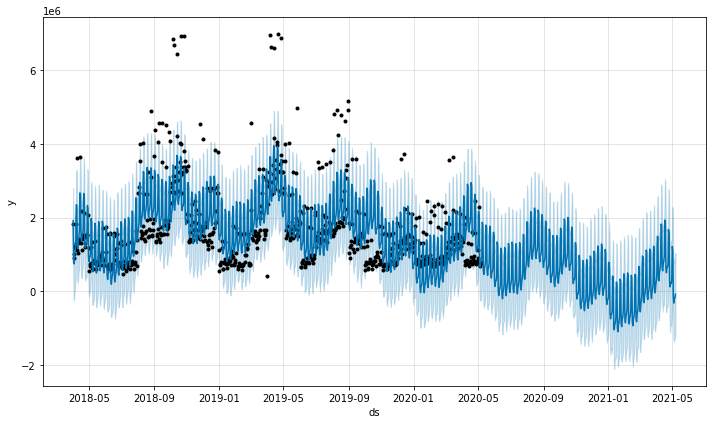

In [100]:
fig1 = m.plot(forecast)

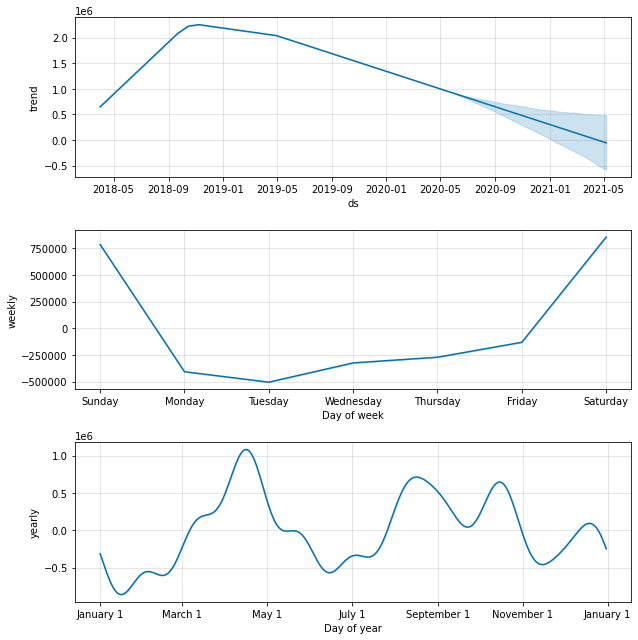

In [101]:
each_component_figure = m.plot_components(forecast)
